<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/adp_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 17회 문제풀이
출처 : https://www.datamanim.com/dataset/ADPpb/00/p3.html

## 1번

데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측하기

데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 

데이터 URL : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem1.csv

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem1.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


### 1-1번
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색
 - 시각화 및 통계량 제시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB
None


,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


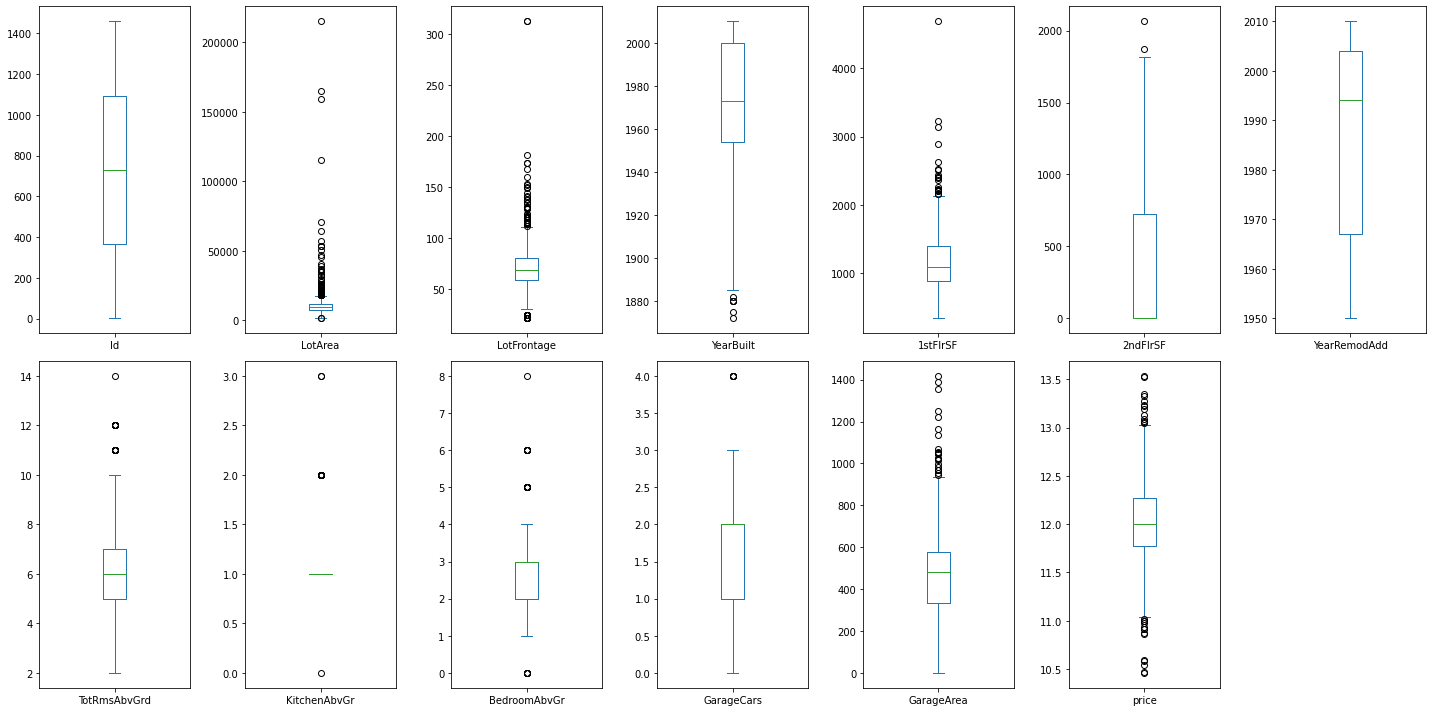


- 모든 컬럼은 Numeric 변수. 
- NaN 이 존재하는 컬럼은 LotFrontage 1개
- 이상치가 존재하지 않는 컬럼은 Id, YearRemodAdd 이다. 나머지 모든 컬럼은 이상치가 존재 한다.
  특히 이상치가 많아 전처리가 꼭 필요할 것으로 보이는 컬럼은 최소 5개 이상이다.



In [2]:
print(df.info())

display(df.describe())


import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(2, len(df.columns)// 2+1), figsize=(20,10))
plt.tight_layout()
plt.show()

print('''
- 모든 컬럼은 Numeric 변수. 
- NaN 이 존재하는 컬럼은 LotFrontage 1개
- 이상치가 존재하지 않는 컬럼은 Id, YearRemodAdd 이다. 나머지 모든 컬럼은 이상치가 존재 한다.
  특히 이상치가 많아 전처리가 꼭 필요할 것으로 보이는 컬럼은 최소 5개 이상이다.
''')

In [3]:
df_tmp = df[df['2ndFlrSF'] > 1800]
display(df_tmp)

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
304,305,18386,87.0,1880,1675,1818,2002,10,1,3,3,870,12.594734
691,692,21535,104.0,1994,2444,1872,1995,10,1,4,3,832,13.534474
1182,1183,15623,160.0,1996,2411,2065,1996,10,1,4,3,813,13.521141


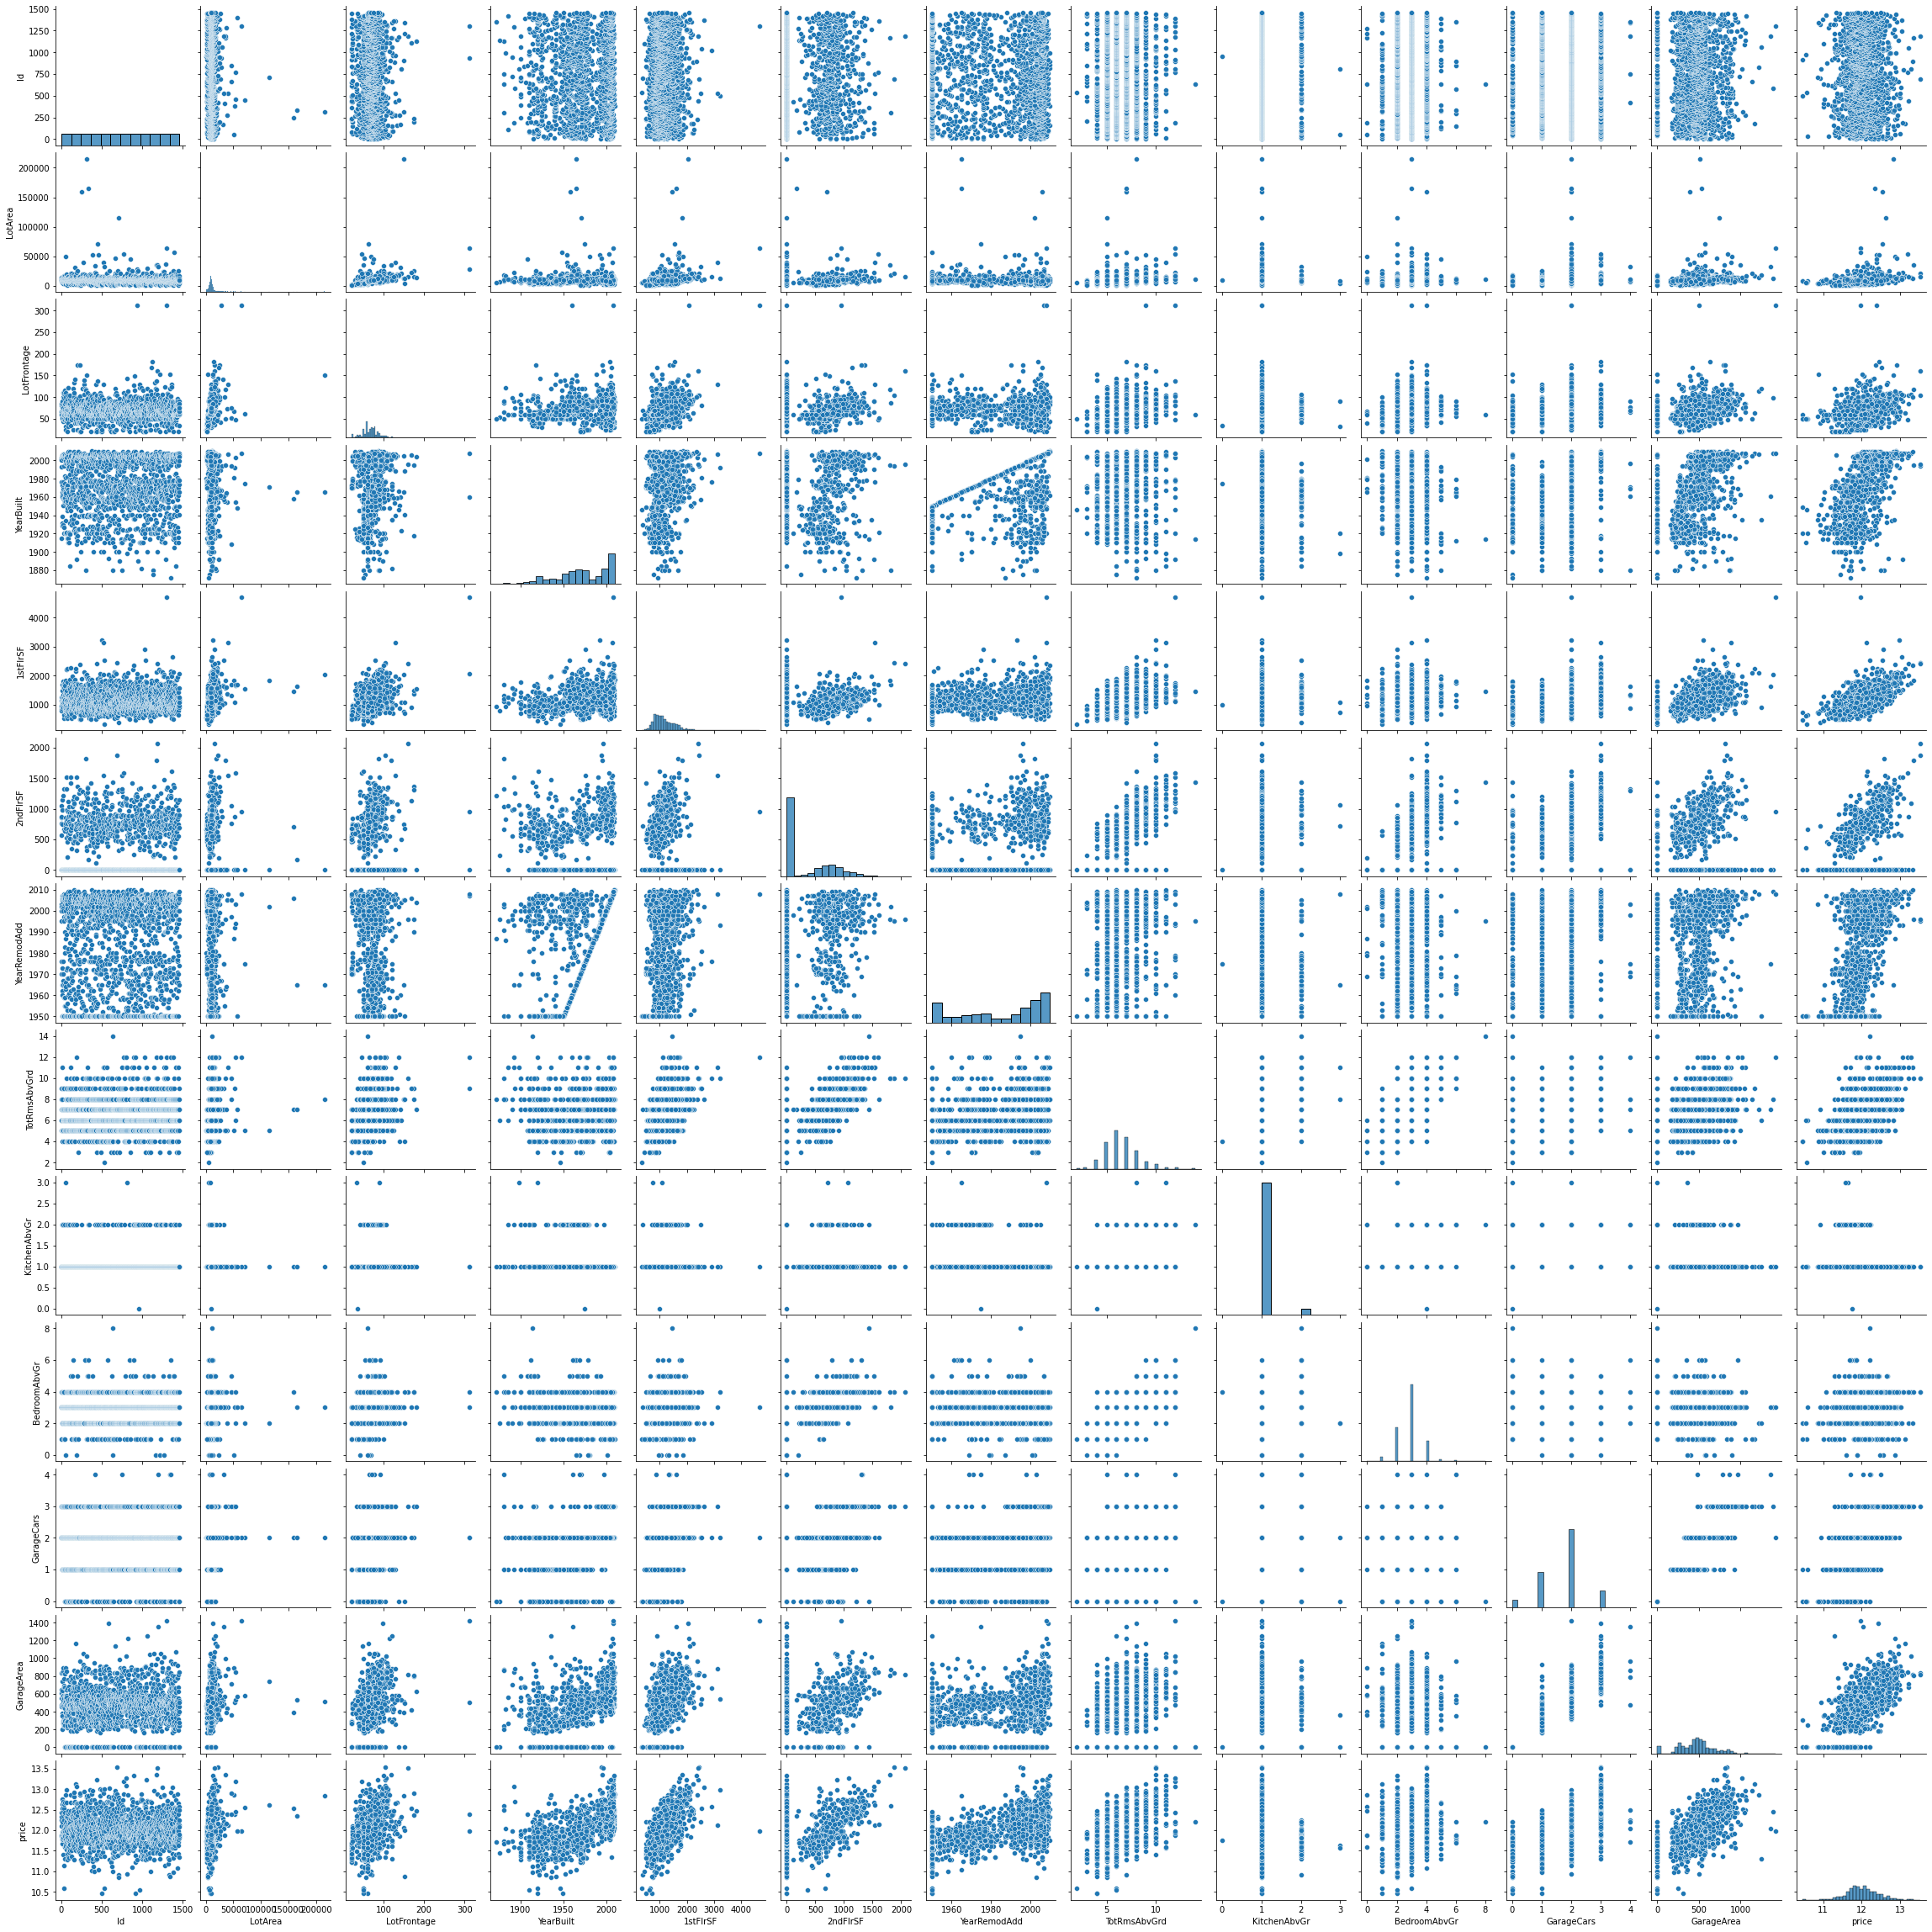

In [4]:
import seaborn as sns

sns.pairplot(df)
# plt.show()

In [5]:
print('''
- price 와 GarageArea, 1stFlrSF, 2ndFlrSF 가 높은 상관관계가 있는 것으로 보임
''')


- price 와 GarageArea, 1stFlrSF, 2ndFlrSF 가 높은 상관관계가 있는 것으로 보임



### 1-2
Train, Valid, Test set으로 분할 및 시각화 제시

스케일링 전 시각화


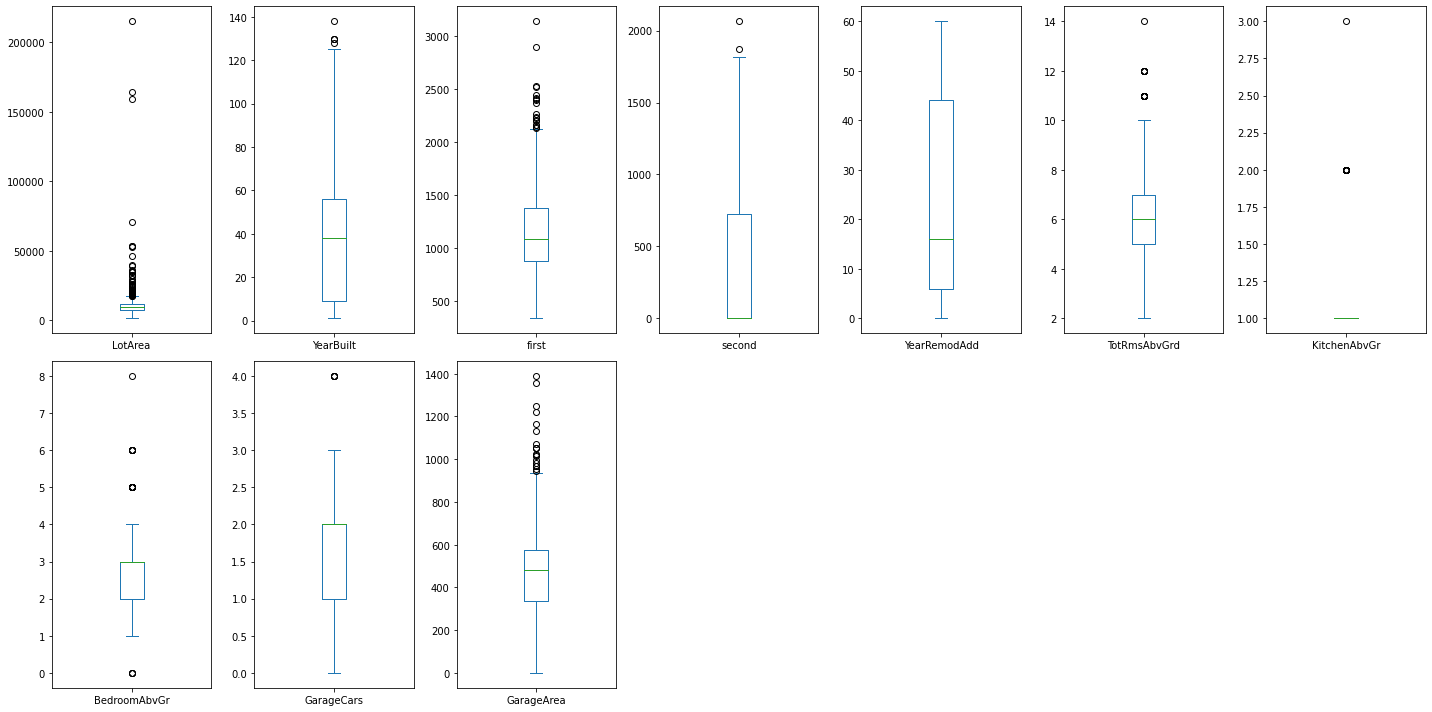

스케일링 후 시각화


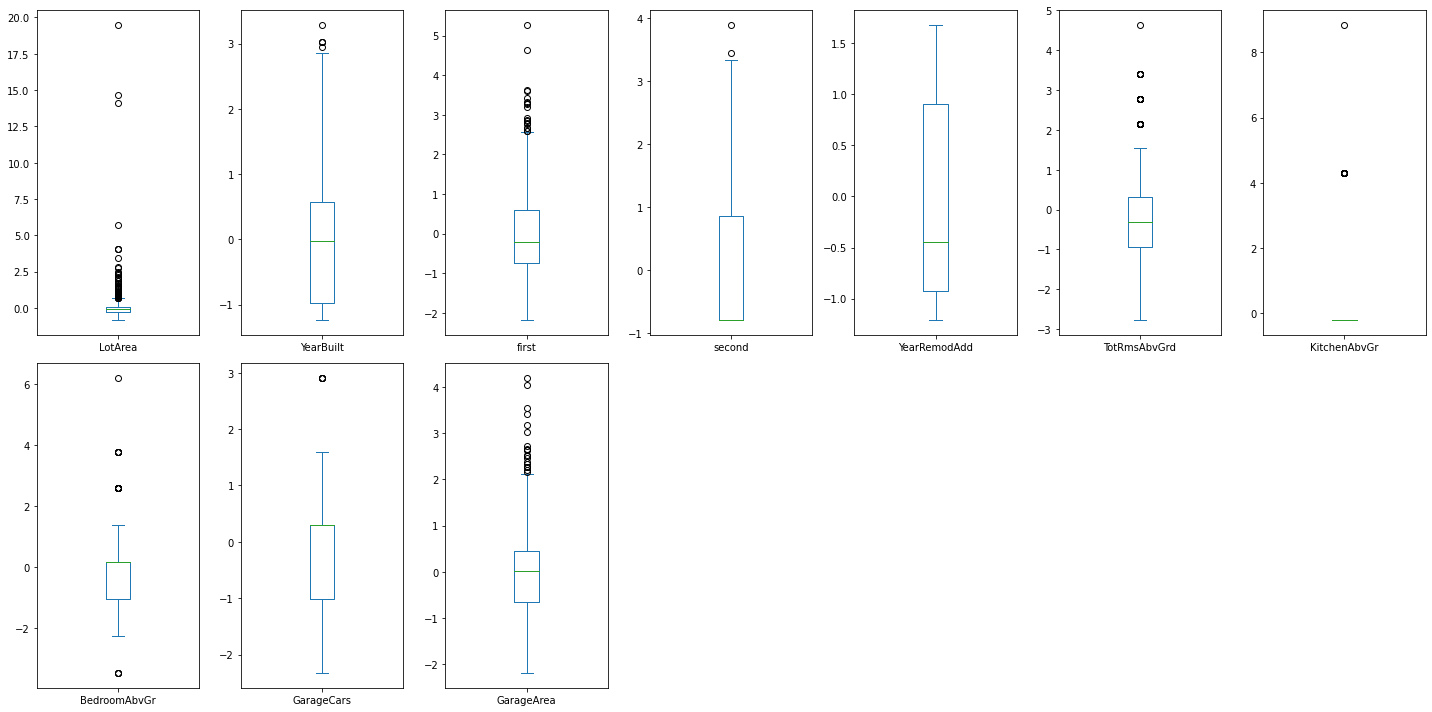


설명 생략 -> 회귀 분석 시 스케일링 하지 않는 것이 r-squared 값이 더 높게 나옴



In [6]:
df2 = df.copy()

# 컬럼에 숫자가 들어가면 statsmodels ols 동작시 에러 발생
df2 = df2.rename(columns={'1stFlrSF':'first', '2ndFlrSF':'second'})

# 년도 데이터의 경우 최대년도 기준 몇년전인지 값으로 대체
df2['YearBuilt'] = abs(df2['YearBuilt'] - df2['YearBuilt'].max())
df2['YearRemodAdd'] = abs(df2['YearRemodAdd'] - df2['YearRemodAdd'].max())

x = df2.drop(columns=['Id', 'price', 'LotFrontage'])
y = df2['price']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y)

sc = StandardScaler()
sc.fit(x_train)

x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

print('스케일링 전 시각화')
x_train.plot(kind='box', subplots=True, layout=(2, len(df.columns) // 2+1), figsize=(20, 10))
plt.tight_layout()
plt.show()

print('스케일링 후 시각화')
pd.DataFrame(x_train_sc, columns=x_train.columns).plot(kind='box', subplots=True, layout=(2, len(df.columns) // 2+1), figsize=(20, 10))
plt.tight_layout()
plt.show()


print('''
설명 생략 -> 회귀 분석 시 스케일링 하지 않는 것이 r-squared 값이 더 높게 나옴
''')







### 1-3
2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [7]:
from itertools import permutations
# permutations : 순열 (순서를 고려한 몇 개를 골라 순서를 고려해 나열한 경우의 수를 말한다. 
# 즉, 서로 다른 n 개 중 r 개를 골라 순서를 정해 나열하는 가짓수이며 
# 순열이라는 의미의 영어 ‘Permutation’의 첫 글자 P를 따서 nPr로 표시한다)
# combinations : 조합 (순서를 고려하지 않고 나열한 경우의 수)
comb = list(permutations(x_train.columns, 3))
print('len:', len(comb))
print('comb:', comb)

# 파이썬은 회귀분석에 있어 모듈이 불친절
# 아래 2차 교호작용을 모두 포함한 컬럼 중에서 각장의 기준에 맞게 변수 선택하면 됨
# 모든 변수 포함 시 단순 다항회귀보다는 r2 값이 크게 나옴

# variables = ' + '.join(list(x_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb])
variables = '+ '.join(list(x_train.columns))
print(variables)

from statsmodels.formula.api import ols

# '+ '.join(list(x_train.columns))
res = ols(f'price ~ {variables}', data=pd.concat([x_train, y_train], axis=1)).fit()
res.summary()

len: 720
comb: [('LotArea', 'YearBuilt', 'first'), ('LotArea', 'YearBuilt', 'second'), ('LotArea', 'YearBuilt', 'YearRemodAdd'), ('LotArea', 'YearBuilt', 'TotRmsAbvGrd'), ('LotArea', 'YearBuilt', 'KitchenAbvGr'), ('LotArea', 'YearBuilt', 'BedroomAbvGr'), ('LotArea', 'YearBuilt', 'GarageCars'), ('LotArea', 'YearBuilt', 'GarageArea'), ('LotArea', 'first', 'YearBuilt'), ('LotArea', 'first', 'second'), ('LotArea', 'first', 'YearRemodAdd'), ('LotArea', 'first', 'TotRmsAbvGrd'), ('LotArea', 'first', 'KitchenAbvGr'), ('LotArea', 'first', 'BedroomAbvGr'), ('LotArea', 'first', 'GarageCars'), ('LotArea', 'first', 'GarageArea'), ('LotArea', 'second', 'YearBuilt'), ('LotArea', 'second', 'first'), ('LotArea', 'second', 'YearRemodAdd'), ('LotArea', 'second', 'TotRmsAbvGrd'), ('LotArea', 'second', 'KitchenAbvGr'), ('LotArea', 'second', 'BedroomAbvGr'), ('LotArea', 'second', 'GarageCars'), ('LotArea', 'second', 'GarageArea'), ('LotArea', 'YearRemodAdd', 'YearBuilt'), ('LotArea', 'YearRemodAdd', 'first

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     510.4
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:58:40   Log-Likelihood:                 397.08
No. Observations:                1095   AIC:                            -772.2
Df Residuals:                    1084   BIC:                            -717.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.5358      0.034    336.729      0.000      11.469      11.603
LotArea        2.74e-06   5.13e-07      5.340      0.000    1.73e-06    3.75e-06
YearBuilt       -0.0030      0.000    -12.552      0.000      -0.003      -0.002
first            0.0005   2.26e-05     21.230      0.000       0.000       0.001
second           0.0003   2.03e-05     14.937      0.000       0.000       0.000
YearRemodAdd    -0.0030      0.000     -9.489      0.000      -0.004      -0.002
TotRmsAbvGrd     0.0255      0.007      3.757      0.000       0.012       0.039
KitchenAbvGr    -0.2607      0.025    -10.358      0.000      -0.310      -0.211
BedroomAbvGr    -0.0270      0.009     -2.979      0.003      -0.045      -0.009
GarageCars       0.0562      0.015      3.638      0.000       0.026       0.087
GarageArea       0.0002   5.24e-05      3.010      0.003    5.49e-05       0.000
==============================================================================
Omnibus:                      486.491   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7402.084
Skew:                          -1.636   Prob(JB):                         0.00
Kurtosis:                      15.310   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-4
벌점, 앙상블을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라.

(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [8]:
# lasso, ridge, randomforest
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# MAE (Mean Absolute Error) : 평균절대오차
# 실제 정답갑과 예측값의 차이를 절대값으로 변환한 뒤 합산하여 평균을 구한다.

# MAPE (Mean Absolute Percentage Error) : 평균절대비율오차
# MAE를 비율, 퍼센트로 표현하여 스케인 의존적 에러의 문제점을 개선.
# 값이 낮을수록 좋음 
def MAPE(y_test, y_pred) :
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

ls = Lasso()
rg = Ridge()
rf = RandomForestRegressor()

def modelpipe(model) :
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, model_pred)
    r2score = r2_score(y_test, model_pred)
    mape = MAPE(y_test, model_pred)

    metrics = [mse, r2score, mape]
    return metrics

ls_result = modelpipe(ls)
rg_result = modelpipe(rg)
rf_result = modelpipe(rf)

result = pd.DataFrame([ls_result, rg_result, rf_result], columns = ['mse', 'r2', 'mape'], index=['lasso', 'ridge', 'randomforest'])
display(result)

,mse,r2,mape
lasso,0.056827,0.626916,1.169541
ridge,0.049865,0.672625,1.104130
randomforest,0.033560,0.779671,1.072725


## 2번
데이터 설명 : 코로나19에 대한 나라별 데이터로 모델링 진행

데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후 처리 

data URL : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv



| 컬럼             | 컬럼명      |
| ---------------- | ----------- |
| location         | 지역명      |
| date             | 일자        |
| total_cases      | 누적 확진자 |
| total_deaths     | 누적 사망자 |
| new_tests        | 검사자      |
| population       | 인구        |
| new_vaccinations | 백신접종자  |


In [35]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv')

print('HEAD')
display(df.head())

print('\n\nINFO')
display(df.info())

print('\n\nDESCRIBE')
display(df.describe())

HEAD


,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN




INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136931 entries, 0 to 136930
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   location          136931 non-null  object 
 1   date              136931 non-null  object 
 2   total_cases       129343 non-null  float64
 3   total_deaths      118074 non-null  float64
 4   new_tests         57061 non-null   float64
 5   population        135951 non-null  float64
 6   new_vaccinations  29414 non-null   float64
dtypes: float64(5), object(2)
memory usage: 7.3+ MB


None



DESCRIBE


,total_cases,total_deaths,new_tests,population,new_vaccinations
count,1.293430e+05,1.180740e+05,5.706100e+04,1.359510e+05,2.941400e+04
mean,2.139281e+06,5.228768e+04,5.870395e+04,1.570279e+08,1.071935e+06
std,1.216339e+07,2.678896e+05,1.988160e+05,7.274416e+08,4.109460e+06
min,1.000000e+00,1.000000e+00,1.000000e+00,4.700000e+01,0.000000e+00
25%,2.547500e+03,8.400000e+01,2.141000e+03,2.078723e+06,6.430000e+03
50%,2.934300e+04,7.835000e+02,7.909000e+03,9.749625e+06,3.846700e+04
75%,2.769900e+05,6.800500e+03,3.135100e+04,3.734479e+07,2.528038e+05
max,2.627975e+08,5.215291e+06,3.740296e+06,7.874966e+09,5.520393e+07


### 2-1
##마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라.##

상위 5개 국가별로 누적확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라.

2021-11-30
type: <class 'str'>


,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,case_ratio
83449,Montenegro,2021-11-30,157376.0,2307.0,NaN,628051.0,NaN,0.250578
83448,Montenegro,2021-11-29,157085.0,2300.0,NaN,628051.0,518.0,0.250115
83447,Montenegro,2021-11-28,156873.0,2285.0,NaN,628051.0,1077.0,0.249777
83446,Montenegro,2021-11-27,156608.0,2283.0,NaN,628051.0,1373.0,0.249356
83445,Montenegro,2021-11-26,156268.0,2281.0,NaN,628051.0,1428.0,0.248814


TOP5:  ['Montenegro' 'Seychelles' 'Andorra' 'Slovakia' 'Georgia']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135745 entries, 0 to 136929
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   location          135745 non-null  object        
 1   date              135745 non-null  datetime64[ns]
 2   total_cases       135745 non-null  float64       
 3   total_deaths      135745 non-null  float64       
 4   new_tests         135745 non-null  float64       
 5   population        135745 non-null  float64       
 6   new_vaccinations  135745 non-null  float64       
 7   case_ratio        135745 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 9.3+ MB


None

TOP5 country: ['Montenegro' 'Seychelles' 'Andorra' 'Slovakia' 'Georgia']


,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,case_ratio,new_cases,new_deaths
136920,Zimbabwe,2021-11-20,133615.0,4699.0,2419.0,15092171.0,33513.0,0.008853,22.0,0.0
136921,Zimbabwe,2021-11-21,133647.0,4699.0,1214.0,15092171.0,23692.0,0.008855,32.0,0.0
136922,Zimbabwe,2021-11-22,133674.0,4699.0,3192.0,15092171.0,14138.0,0.008857,27.0,0.0
136923,Zimbabwe,2021-11-23,133674.0,4699.0,3085.0,15092171.0,20877.0,0.008857,0.0,0.0
136924,Zimbabwe,2021-11-24,133747.0,4703.0,2865.0,15092171.0,32154.0,0.008862,73.0,4.0
136925,Zimbabwe,2021-11-25,133774.0,4704.0,2291.0,15092171.0,26173.0,0.008864,27.0,1.0
136926,Zimbabwe,2021-11-26,133836.0,4704.0,2719.0,15092171.0,31285.0,0.008868,62.0,0.0
136927,Zimbabwe,2021-11-27,133836.0,4704.0,4152.0,15092171.0,16111.0,0.008868,0.0,0.0
136928,Zimbabwe,2021-11-28,133951.0,4705.0,1044.0,15092171.0,8252.0,0.008876,115.0,1.0
136929,Zimbabwe,2021-11-29,134226.0,4706.0,3067.0,15092171.0,17809.0,0.008894,275.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 135745 entries, 0 to 136929
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   location          135745 non-null  object        
 1   date              135745 non-null  datetime64[ns]
 2   total_cases       135745 non-null  float64       
 3   total_deaths      135745 non-null  float64       
 4   new_tests         135745 non-null  float64       
 5   population        135745 non-null  float64       
 6   new_vaccinations  135745 non-null  float64       
 7   case_ratio        135745 non-null  float64       
 8   new_cases         135510 non-null  float64       
 9   new_deaths        135510 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 15.4+ MB
None


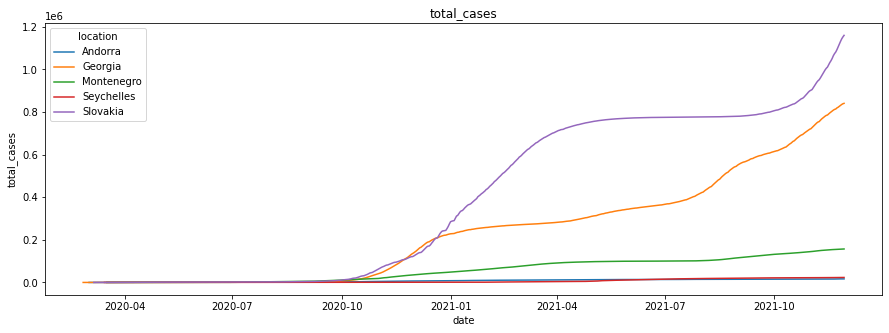

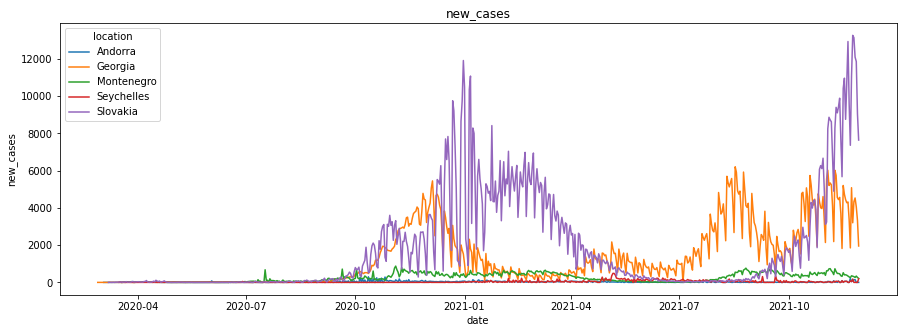

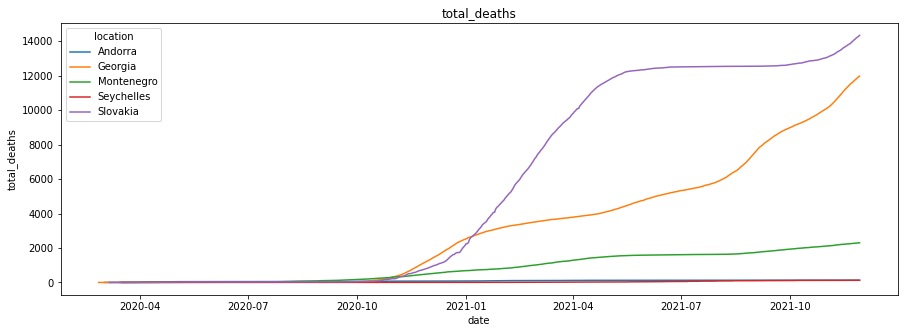

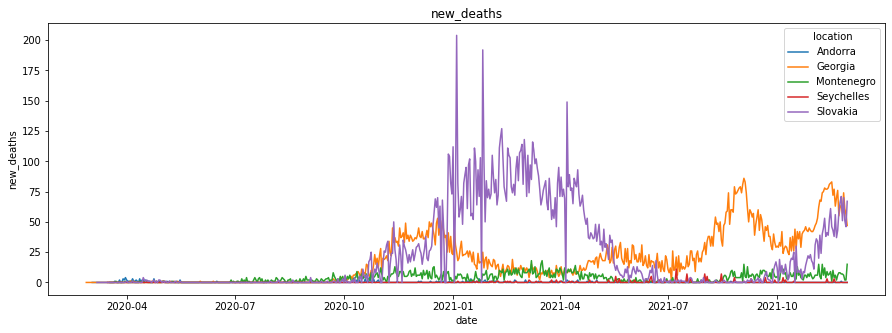

In [36]:
# 상위 5개 국가 추출
print(df.date.max())
latest_date = df.date.max()
print('type:', type(latest_date))

df['case_ratio'] = df.total_cases / df.population
display(df.sort_values(by=['case_ratio'], ascending=False).head(5))

top5_loc = df.groupby(by=['location']).tail(1).sort_values(by=['case_ratio'], ascending=False).head(5).location.values
print('TOP5: ', top5_loc)

# nan 값을 0으로 채움
# 2021-11-30 (latest_date) 에는 new_tests, new_vaccinations 값이 nan 이므로 제외
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df = df[df.date != latest_date]
df = df[df.population != 0]

display(df.info())

# 5개 국가의 일일 확진자, 일일 사망자 추출

print('TOP5 country:', top5_loc)
# display(df_loc)
for loc in df.location.unique() :
    lo = df[df.location == loc]
    df.loc[lo.index, 'new_cases'] = lo['total_cases'].diff().values
    df.loc[lo.index, 'new_deaths'] = lo['total_deaths'].diff().values

display(df.tail(10))
print(df.info())

import seaborn as sns
import matplotlib.pyplot as plt



target = df[df.location.isin(top5_loc)].reset_index(drop=True)

for v in ['total_cases', 'new_cases', 'total_deaths', 'new_deaths'] :
    plt.figure(figsize=(15, 5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')

plt.show()

아래는 datamanim 답지
위 소스 코드는 내가 한 것

In [ ]:
# df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p3/problem2.csv')
# df['ratio'] = df['total_cases'] / df['population']


# # 전체 데이터의 결측치 및 일일 확진, 사망자 확인
# # 2021-11-30에는 new_tests , new_vaccinations값이 nan 이므로 제외
# # 인구수 0인 케이스 제외
# import matplotlib.pyplot as plt 
# df = df.fillna(0)
# df['date']  = pd.to_datetime(df['date'])
# df = df[df.date != pd.to_datetime('2021-11-30')]
# df = df[df.population !=0]

# for location in df.location.unique():
#     lo = df[df.location == location]
#     df.loc[lo.index,'new_cases'] =lo.total_cases.diff().values  # diff() : difference with previous row
#     df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]

#     df.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
#     df.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
#     df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
#     df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

# import seaborn as sns
# import matplotlib.pyplot as plt


# locations = df.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
# target = df[df.location.isin(locations)].reset_index(drop=True)
# for v in ['total_cases','new_cases','total_deaths','new_deaths']:
#     plt.figure(figsize = (15,5))
#     plt.title(v)
#     sns.lineplot(data=target,x= 'date',y=v,hue='location')
#     plt.show()

### 2-2
코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화


코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 
코로나 전파 특성상 최근 일주일 확진자 숫자가 그 다음의 일주일에 영향을 준다.

일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 
위기정도는 누적 백신인구에 의해 감소 될 수 있다.

국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고,
변수간 보정상수를 통해 정수화를 유도한다.

TOP10 LOC:  ['Cyprus' 'Austria' 'Greece' 'Denmark' 'United Kingdom' 'Czechia'
 'Slovakia' 'Italy' 'Belgium' 'Israel']


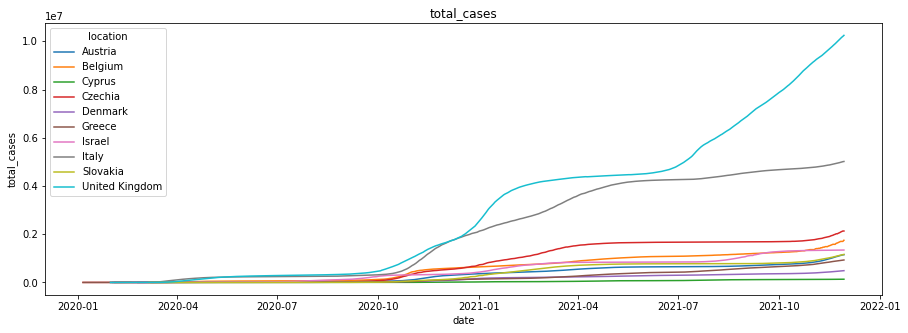

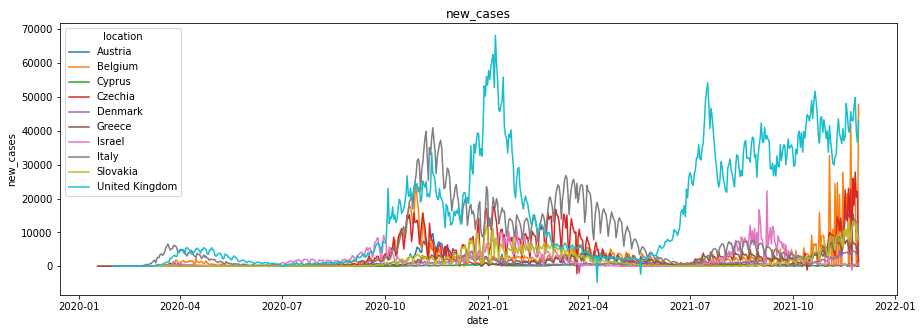

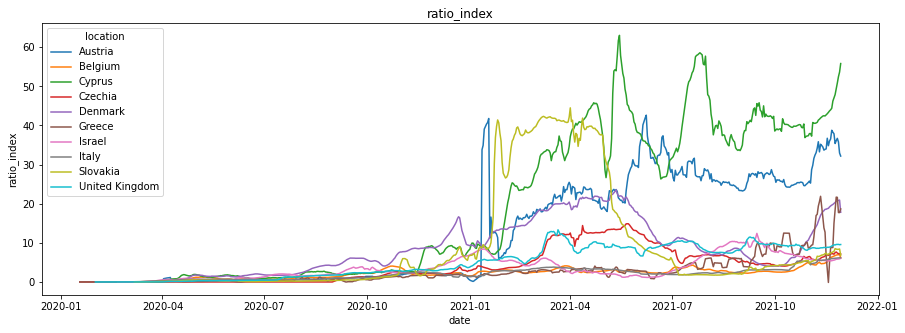

In [37]:
# 위험지수 = ((최근 일주일 누적 확진자 / 인구수) + (일일 사망자 / 인구수) - (누적 백신 인구 / 인구수) * 보정상수) * 보정상수
print('''
코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 
코로나 전파 특성상 최근 일주일 확진자 숫자가 그 다음의 일주일에 영향을 준다.

일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 
위기정도는 누적 백신인구에 의해 감소 될 수 있다.

국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고,
변수간 보정상수를 통해 정수화를 유도한다.
''')

for location in df.location.unique() :
    lo = df[df.location == location]
    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

# display(df_loc.tail(20))
def ratio_index(x) :
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population'] * 0.001) * 100
    # print('VALUE: ', value)
    return value

df['ratio_index'] = df.apply(ratio_index, axis=1)
# display(df_loc.tail(10))
top10_loc = df.groupby(['location']).tail(1).sort_values('ratio_index', ascending=False).location.head(10).values
print('TOP10 LOC: ', top10_loc)
target = df[df.location.isin(top10_loc)].reset_index(drop=True)

for v in ['total_cases', 'new_cases', 'ratio_index'] :
    plt.figure(figsize=(15, 5))
    plt.title(v)
    sns.lineplot(data=target, x='date', y=v, hue='location')

plt.show()

### 2-3
한국의 코로나 신규 확진자 예측해라 (선형 시계열모델 + 비선형 시계열 각 각 한 개씩 만들어라)

- 선형시계열 : arma
- 비선형시계열 : arima

In [67]:
ko = df[df.location == 'South Korea'][['date', 'new_cases']].reset_index(drop=True)
ko.set_index(ko.date, drop=True, inplace=True)
ko = ko.drop(columns=['date'])
display(ko.head())

import numpy as np
print('nan sum', ko.isna().sum())
ko = ko.fillna(0)
print(ko.info())
display(ko.describe())

,new_cases
date,
2020-01-21,NaN
2020-01-22,1.0
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0


nan sum new_cases    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679 entries, 2020-01-21 to 2021-11-29
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_cases  679 non-null    float64
dtypes: float64(1)
memory usage: 10.6 KB
None


,new_cases
count,679.000000
mean,658.659794
std,777.856644
min,0.000000
25%,68.000000
50%,418.000000
75%,832.500000
max,4115.000000


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


========== ARMA RESULT ==========
                            AutoReg Model Results                             
Dep. Variable:              new_cases   No. Observations:                  679
Model:                     AutoReg(3)   Log Likelihood               -4376.552
Method:               Conditional MLE   S.D. of innovations            156.844
Date:                Fri, 16 Dec 2022   AIC                             10.125
Time:                        09:12:17   BIC                             10.159
Sample:                    01-24-2020   HQIC                            10.138
                         - 11-29-2021                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.0652      7.966      1.264      0.206      -5.547      25.678
new_cases.L1     0.9978      0.037     27.163      0.000       0.926       1.070
new_cases.

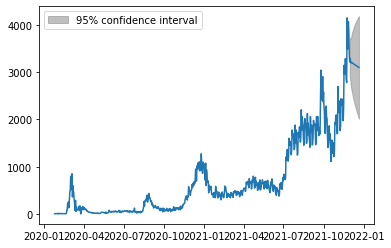

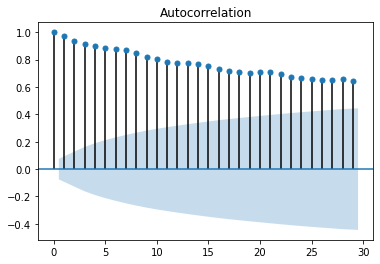

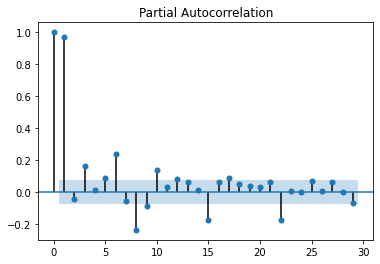



=============== 1차분 ====================


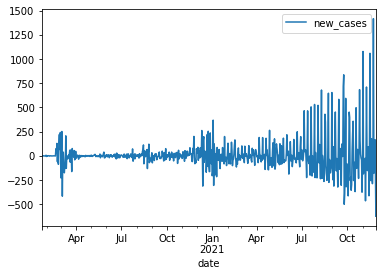

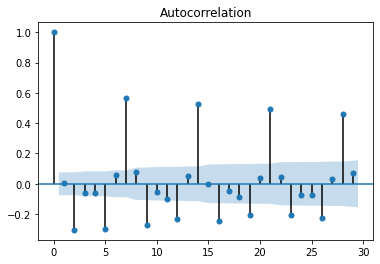

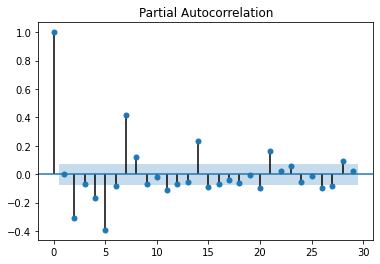




========== ARMA RESULT ==========
                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                  679
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4422.919
Date:                Fri, 16 Dec 2022   AIC                           8849.837
Time:                        09:12:18   BIC                           8858.876
Sample:                    01-21-2020   HQIC                          8853.336
                         - 11-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0072      0.025      0.286      0.775      -0.042       0.057
sigma2       2.73e+04    486.188     56.156      0.000    2.63e+04    2.83e+04
Ljung-Box (L1) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


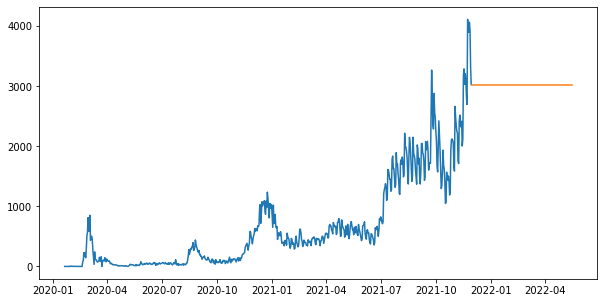

In [68]:
# 선형모델 : arma
from statsmodels.tsa.ar_model import AutoReg
# mod = AutoReg(ko.new_cases, 3, old_names=False)
mod = AutoReg(ko, 3, old_names=False)
res = mod.fit()
print('========== ARMA RESULT ==========')
print(res.summary())
fig = res.plot_predict(1, 700)

# 비선형모델 : arima 사용
# order(0,1,1) 에 사용된 값은 아래 URL 참조
# https://byeongkijeong.github.io/ARIMA-with-Python/
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print('ACF , PACF 값 예측')
# plot_acf(ko.new_cases)
# plot_pacf(ko.new_cases)
plot_acf(ko)
plot_pacf(ko)
plt.show()

print('\n\n=============== 1차분 ====================')
# diff_1 = ko.new_cases.diff(periods=1).iloc[1:]
diff_1 = ko.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()
print(' ===========================================================')



# model = ARIMA(ko.new_cases, order=(0, 1, 1))
model = ARIMA(ko, order=(0, 1, 1))
model_fit = model.fit()
print('\n\n\n========== ARMA RESULT ==========')
print(model_fit.summary())

forecast = model_fit.forecast(steps=24 * 7)

plt.figure(figsize=(10, 5))
# plt.plot(ko.new_cases)
# plt.plot(forecast)
plt.plot(ko)
plt.plot(forecast)